# mnist fashion
1. test 데이터 중 첫번 째 데이터를 이미지로 표시 -> 이미지 제출
2. fashion-mnist_train.csv(60000), fashion-mnist_test.csv(10000)
    - RandomForestClassifier
    - GradientBoostingClassifier
    - MLPClassifier
    - SVC

3. 최적의 파라미터를 검색해서 학습 (GridSearchCV), 정답률 제출(ipynb 코드를 제출)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# make model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier # 최적화 된 값을 선택할 때 사용
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

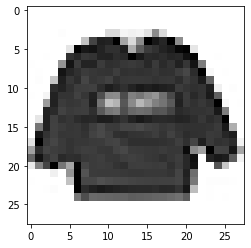

In [ ]:
train = open('fashion-mnist_train.csv', 'r')
test = open('fashion-mnist_train.csv', 'r')
train_list = train.readlines()

all_values = train_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))

plt.imshow(image_array, cmap='Greys', interpolation=None)
plt.show()

In [ ]:
# # 모든 이미지
# for i in range(len(train_list)-1):
#     all_values = train_list[i+1].split(',')
#     image_array = np.asfarray(all_values[1:]).reshape((28,28))
#     plt.imshow(image_array, cmap='Greys', interpolation=None)
#     plt.show()

## Model

In [ ]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
datas = [train, test]
datas

[      label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
 0         2       0       0       0  ...         0         0         0         0
 1         9       0       0       0  ...         0         0         0         0
 2         6       0       0       0  ...         0         0         0         0
 3         0       0       0       0  ...         0         0         0         0
 4         3       0       0       0  ...         0         0         0         0
 ...     ...     ...     ...     ...  ...       ...       ...       ...       ...
 4995      7       0       0       0  ...         0         0         0         0
 4996      7       0       0       0  ...         0         0         0         0
 4997      6       0       0       0  ...         0         0         0         0
 4998      3       0       0       0  ...         0         0         0         0
 4999      6       0       0       0  ...       113        46         0         0
 
 [5000 rows x 

In [ ]:
x = train.iloc[:, 1:] # x =train.loc[:, 'pixel1':'pixel784']
y = train.iloc[:, :1]
print(x, y)

      pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
0          0       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          0       0       0       0  ...         0         0         0         0
3          0       0       0       1  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
4995       0       0       0       0  ...         0         0         0         0
4996       0       0       0       0  ...         0         0         0         0
4997       0       0       0       0  ...         0         0         0         0
4998       0       0       0       0  ...         0         0         0         0
4999       0       0       0       0  ...       113        46         0         0

[5000 rows x 78

## RandomForest

In [ ]:
# RandomForest
rf = RandomForestClassifier()
# Grid Search
rf_param_grid = {
    'max_depth': [None], # default 값 사용
    'max_features': [1, 3, 5],
    'min_samples_split':[2, 3, 10],
    'min_samples_leaf':[1, 3, 10],
    'bootstrap':[False],
    'n_estimators':[100, 300, 500, 700, 800, 900]
}
rf_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring='accuracy', n_jobs=4, verbose=1)
rf_grid.fit(x,y.values.ravel()) # ravel은 다차원의 배열을 1차원 배열로 평평하게 바꿔줌!!

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  7.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 21.0min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 49.0min
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed: 50.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
# best_estimator_estimator
# best_score_:float, best_params_:dict, best_index_:int, scorer_:function or a dict, n_splits_:int, refit_time_:float

best_score = rf_grid.best_score_
rf_best = rf_grid.best_estimator_

print(best_score)
print(rf_best)

0.8533999999999999
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## GradientBoost

In [ ]:
# GradientBoost
gb = GradientBoostingClassifier()
# Grid Search
gb_param_grid ={
    'loss':['deviance'],
    'n_estimators':[100, 300, 500, 1000],
    'learning_rate':[0.1, 0.05, 0.01],
    'max_depth':[4, 8],
    'max_feature':[0.3, 0.1],
    'min_sample_leaf':[100, 150, 200]
}

gb_grid = GridSearchCV(rf, param_grid=rf_param_grid, scoring = 'accuracy', n_jobs=5, verbose=1)
gb_grid.fit(x,y)

best_score = gb_grid.best_score_
gb_best = gb_grid.best_estimator_

print(best_score)
print(gb_best)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.8min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  7.3min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 20.8min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed: 49.0min
[Parallel(n_jobs=5)]: Done 810 out of 810 | elapsed: 51.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8495999999999999
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## SVM

In [ ]:
# SVM
# scv = SVC(probability=True)
svc = SVC()
svc_param_grid = {'kernel':['rbf'], 'gamma':[0.001, 0.01, 0.1, 0.5, 1], 'C':[0.01, 0.1, 1, 10, 50, 100, 200, 300]}

svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, scoring='accuracy', n_jobs=4, verbose=1) # verbose가 0이면 백그라운드에서 실행되기 때문에 결과를 확인할 수 없다.
svc_grid.fit(x,y)
svc_best = svc_grid.best_estimator_
print(svc_grid.best_score_)
print(svc_grid.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 17.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 77.9min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 81.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1034
{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}


In [5]:
# SVM
# svc = SVC(probability=True)
svc = SVC()
svc_param_grid = {'kernel':['rbf', 'linear', 'sigmoid'], 'gamma':[0.001, 0.01, 0.1, 0.5, 1], 'C':[0.01, 0.1, 1, 10, 50, 100, 200, 300], 'random_state':[1]}

svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, scoring='accuracy', n_jobs=4, verbose=1) # verbose가 0이면 백그라운드에서 실행되기 때문에 결과를 확인할 수 없다.
svc_grid.fit(x,y)
svc_best = svc_grid.best_estimator_
print(svc_grid.best_score_)
print(svc_grid.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 10.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 47.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 108.7min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed: 147.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8106
{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear', 'random_state': 1}


## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
mlp = MLPClassifier()
mlp_param_grid = {
    'solver':['sgd', 'adam'],
    'hidden_layer_sizes':[100, 200, 300],
    'random_state':[1]
}
mlp_grid = GridSearchCV(mlp, param_grid=mlp_param_grid, scoring='accuracy', n_jobs=4, verbose=1)
mlp_grid.fit(x,y)

mlp_best = mlp_grid.best_estimator_
print(mlp_grid.best_score_)
print(mlp_best)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  8.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8241999999999999
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=300, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
# voting
vote = VotingClassifier(estimators=[('rf', rf_best), ('gb', gb_best), ('svc', svc_best), ('mlp', mlp_best)], voting='soft', n_jobs =4)
vote_result = vote.fit(x,y)
vote_result

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=5,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
            

In [ ]:
# test = test.drop(['label'], axis=1)
# pred = vote.predict(test)
# pred